In [8]:
#K means algorithm for customer segmentation
#import nessaccary libaries and dataset
import sklearn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import seaborn as sns

In [10]:
data=pd.read_csv("Mall_Customers.csv")
#  Dataset info
data.head()


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [11]:
data.info()
data.describe()
data.shape
data.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [33]:
#using only numerical data for segmentation
data=data[['CustomerID','Age','Annual Income (k$)','Spending Score (1-100)']]
data.head()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
0,1,19,15,39
1,2,21,15,81
2,3,20,16,6
3,4,23,16,77
4,5,31,17,40


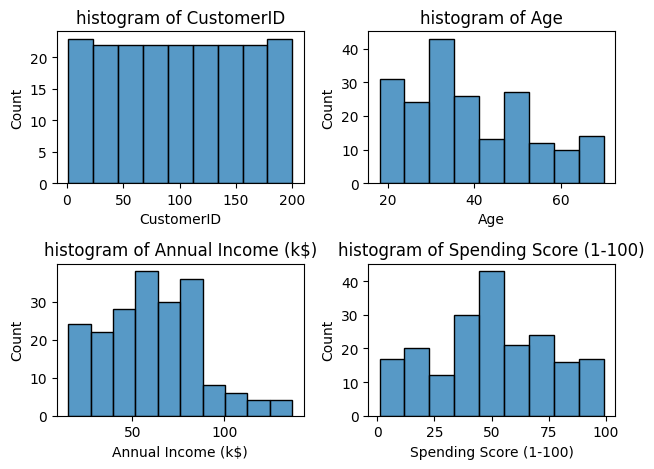

In [37]:
#Visualizing dataset
figure,axes=plt.subplots(2,2,figure=(10,5))
axes=axes.ravel()
for row,col in enumerate(data.columns):
    sns.histplot(data[col],ax=axes[row])
    axes[row].set_title("histogram of "+ col)
plt.tight_layout()
plt.show()

In [44]:
#Treating outlier 
scaler=StandardScaler()
data_scaled=scaler.fit_transform(data)

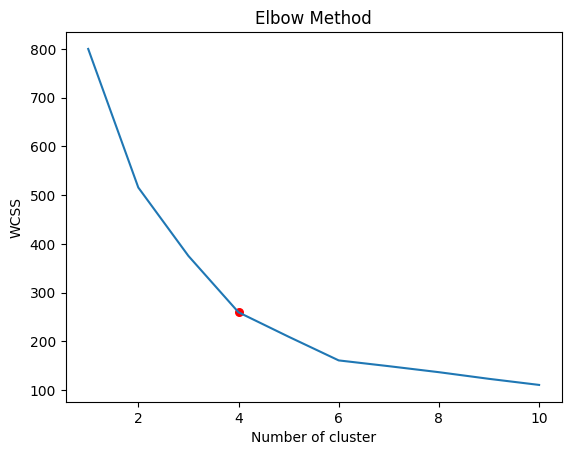

In [66]:
#elbow method to determine optimal clusters
%pip install kneed
from kneed import KneeLocator
wcss=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i, random_state=42)
    kmeans.fit(data_scaled)
    wcss.append(kmeans.inertia_)
sns.lineplot(x=range(1,11),y=wcss)
plt.title("Elbow Method")
plt.xlabel("Number of cluster")
plt.ylabel("WCSS")
knee=KneeLocator(range(1,11),wcss,curve='convex',direction='decreasing')
plt.axvline(knee.knee,plt.ylim()[0], plt.ylim()[1],linestyle='--')
plt.scatter(knee.knee,knee.knee_y,color='red',s=30)
plt.show()

In [72]:
#optimal cluster is 4, fit the dataset into cluster.
kmeans=KMeans(n_clusters=4,random_state=42)
y_kmeans=kmeans.fit_predict(data_scaled)

In [79]:
#analyse the characteristics
data['clusters']=y_kmeans
summary=data.groupby('clusters').agg({'Age':'mean','CustomerID' : 'count','Spending Score (1-100)' : 'mean','Annual Income (k$)':'mean'}).rename({'Age':'Mean Age','CustomerID':'Total CustomerID','Spending Score (1-100)':'Mean Spending Score','Annual Income (k$)':'Mean Annual Income'})
print(summary)

                Age  CustomerID  Spending Score (1-100)  Annual Income (k$)
clusters                                                                   
0         54.766667          60               41.783333           47.933333
1         32.731707          41               80.902439           85.634146
2         25.949153          59               58.067797           38.779661
3         40.275000          40               19.750000           85.925000


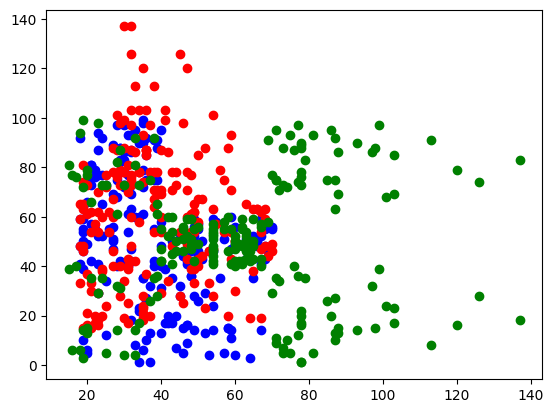

In [78]:
plt.scatter(data['Age'],data['Spending Score (1-100)'],color='b')
plt.scatter(data['Age'],data['Annual Income (k$)'],color='r')
plt.scatter(data['Annual Income (k$)'],data['Spending Score (1-100)'],color='g')
plt.show()
